# Load prediction from energy bills - Exploratory Data Analysis

## Description
This Jupyter Notebook contains code for conducting exploratory data analysis (EDA) on a dataset of electricity consumption records. Each sample in the dataset is representative of the electricity consumption of a customer over a one-month period.
However, due to sensitivity of the data, only time-aggregated values are shown.
Therefore, the data are reported in terms of:
- monthly energy consumption in different time-of-use (ToU) tariffs [(IRENA 2019)](https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2019/Feb/IRENA_Innovation_ToU_tariffs_2019.pdf?la=en&hash=36658ADA8AA98677888DB2C184D1EE6A048C7470)
- hourly consumption in typical days, identified according to the Italian ToU tariff scheme [(ARERA 2007)](https://www.arera.it/it/docs/06/181-06.htm).

Furthermore, each sample includes information about the customers (type, class of consumption, category of end user) and month details (number of days for each day type).

The purpose of this notebook is to perform EDA on the dataset and gain insights into its composition and characteristics. The EDA process involves analyzing the dataset, visualizing the data, and exploring different aspects of the electricity consumption patterns.

## Outline
The notebook is structured as follows:

1. Import Libraries: This section imports the necessary Python libraries and modules for data analysis and visualization.
2. Plot Settings: Here, the default settings for matplotlib plots are configured.
3. Load Dataset: This section loads the dataset from a CSV file named 'dataset.csv' located in the same directory as the notebook. It also defines the column names for different attributes in the dataset.
4. Exploratory Data Analysis:
   - Doughnut charts of dataset composition by type of end user: This analysis visualizes the distribution of the dataset based on the type of end user. It creates two concentric doughnut charts to show the composition by the type of end user and the category of end user.
   - Boxplots of ToU monthly energy consumption by type of end user: This analysis examines the distribution of time-of-use (ToU) monthly energy consumption across different types of end users. Aligned boxplots are created to compare the consumption patterns.
   - Percentiles of hourly consumption profiles by type of end user: This analysis focuses on the hourly consumption patterns of different types of end users. It creates profile plots showing the percentiles of the hourly consumption profiles.
 5. Dataset Normalization: This section performs normalization on the dataset to account for variations in consumption values across different end-user classes. Both the monthly and hourly consumption values are normalized.
 6. Exploratory Data Analysis of normalized consumption values: This section repeats the exploratory analysis on the normalized dataset. It includes boxplots of normalized ToU consumption and percentiles of the hourly consumption.

Please note that this notebook assumes the dataset is stored in a CSV file named 'dataset.csv' and should be located in the same directory as this notebook. You may need to modify the code accordingly if your dataset has a different name or location.

## Info
- Author: G. Lorenti (gianmarco.lorenti@polito.it)
- Date: 21.05.2023

### Requirements
- Python version: 3.x
- Libraries: numpy, pandas, matplotlib
- Self-created modules: common, plotting

### Reference and citation
Please refer to the file [README.md](README.md) for instructions.


In [1]:
# Import statement
# from Python libraries, packages, modules
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
# form self-created modules
from bill2watt.common.common import *
from plotting import *

In [2]:
# Plot settings

# Default parameters for matplotlib
plt.rcParams.update({'figure.facecolor': 'white',
                     'font.family': 'Arial'})

# Figure saving settings
savefig = False  # turn tu True to save the figures
fmt = 'png'  # format for saving the figures
dpi = 600  # dpi for saving the figures

os.makedirs(outpath:='Output', exist_ok=True)

In [3]:
# Loading the training/testing dataset
data = pd.read_csv('dataset.csv', sep=';')
# import columns
col_type = 'type'  # column with the type of end user
col_class = 'class'  # column with the class of end user
col_category = 'category'  # column with the category of end user
cols_x = [f"x_f{f}" for f in fs]  # columns with values of the x
cols_y = [f"y_i{i}" for i in range(ni)]  # columns with values of the y

# visualizing the dataset
data.head(12)

,user,month,type,class,category,nd_j0,nd_j1,nd_j2,x_f1,x_f2,...,y_i62,y_i63,y_i64,y_i65,y_i66,y_i67,y_i68,y_i69,y_i70,y_i71
0,bta5_6,0,bta,bta5,cultural_and_sports,20,4,7,221.760,191.148,...,0.953714,1.928571,1.617000,1.294429,2.101715,1.229429,0.750286,0.727286,0.713000,0.579143
1,bta5_6,1,bta,bta5,cultural_and_sports,20,4,4,224.623,181.216,...,1.375500,1.903500,1.362000,1.841000,1.163250,2.554250,1.531500,1.298750,0.722000,0.583500
2,bta5_6,2,bta,bta5,cultural_and_sports,23,4,4,276.134,195.086,...,1.246250,2.691750,2.315750,1.038750,2.151000,2.907250,1.535000,1.207250,0.714750,0.610750
3,bta5_6,3,bta,bta5,cultural_and_sports,21,4,5,186.458,184.092,...,0.450200,0.450000,0.962600,0.855200,0.473800,1.138800,0.806800,0.798200,0.708800,0.573800
4,bta5_6,4,bta,bta5,cultural_and_sports,21,4,6,205.442,161.405,...,1.565500,1.519500,1.386833,1.268500,1.180500,1.179333,1.244667,1.761333,1.029000,0.572833
5,bta5_6,5,bta,bta5,cultural_and_sports,21,4,5,224.155,143.920,...,0.527600,0.959800,1.082800,0.972200,1.123200,1.706800,0.914800,1.477200,0.723200,0.575600
6,bta5_6,6,bta,bta5,cultural_and_sports,22,5,4,169.361,145.230,...,0.470500,0.470000,0.470000,0.526500,0.667250,1.262250,1.342500,0.789000,1.109250,0.822250
7,bta5_6,7,bta,bta5,cultural_and_sports,22,4,5,197.543,128.508,...,0.964600,0.485800,0.959600,0.473600,0.492400,0.778400,1.146400,0.729800,0.694400,0.567000
8,bta5_6,8,bta,bta5,cultural_and_sports,22,4,4,202.346,159.409,...,1.650500,1.365000,0.640750,0.927750,0.853750,1.171500,2.322000,1.172750,0.744250,0.857000
9,bta5_6,9,bta,bta5,cultural_and_sports,21,5,5,221.844,216.094,...,0.611400,0.967400,1.214000,1.302800,3.193200,2.189600,1.381200,0.962600,0.681800,0.578400


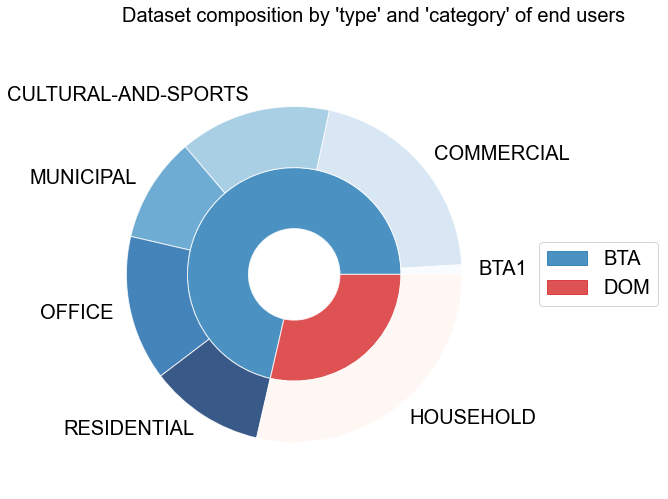

In [4]:
# Exploratory Data Analysis - Dataset composition
# here, we analyze the dataset composition in terms of end-user type and, respectively class and categories,
# by creating two concentric doughnut charts.
# NOTE: the two columns must be two-levels division of the dataset!

# Main plot parameters
col_in = col_type  # column for the inner doughnut
col_out = col_category  # column for the outer doughnut
# NOTE: select 'col_class' or 'col_category'
plot_data = data[[col_in, col_out]].apply(lambda s: s.str.upper().str.replace('_', '-'))

# Additional plot parameters
kwargs = dict(
    title=f"Dataset composition by '{col_in}' and '{col_out}' of end users",
    figsize=(10, 8),
    fontsize=20,
)

# Create, show, and save the figure
fig = create_two_doughnuts(plot_data, col_in, col_out, **kwargs)
fig.subplots_adjust()  # trim any extra space on the plot
plt.show()
if savefig:
    fig.savefig(os.path.join(outpath, "fig_dataset_composition.png"), format=fmt, dpi=dpi)

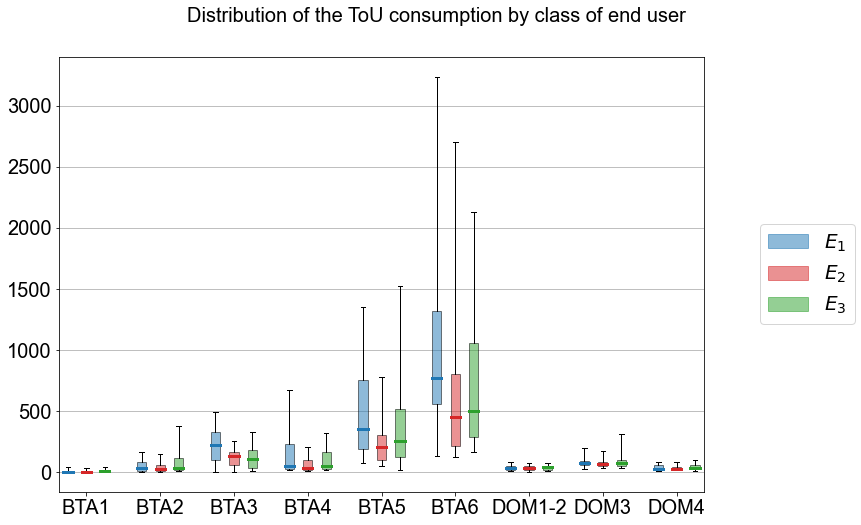

In [5]:
# Exploratory Data Analysis - Dataset composition

# Here, we analyze the dataset composition in terms of end user's monthly ToU consumption
# by creating one aligned boxplot for each ToU tariff, organized by end-user class.

# Main plot parameters
cols = cols_x  # columns with the ToU consumption
groupby = col_class # column(s) based on which samples are grouped
plot_data = data[cols].join(data[[groupby] if isinstance(groupby, str) else groupby]
                            .apply(lambda s: s.str.upper().str.replace('_', '-')),)

# Additional plot parameters
kwargs = dict(
    title=f"Distribution of the ToU consumption by {groupby} of end user",
    figsize=(14, 8),
    fontsize=20,
    horizontal=False,
    xlabel='Monthly energy (kWh)',
    legend_labels=["$E_\mathrm{1}$", "$E_\mathrm{2}$", "$E_\mathrm{3}$"]
)

# Create, show and save figure
fig = create_aligned_boxplots(plot_data, groupby=groupby, cols=cols, **kwargs)
fig.subplots_adjust()  # trim any extra space on the plot
plt.show()
if savefig:
    fig.savefig(os.path.join(outpath, "fig_tou_consumption_boxplot.png"), format=fmt, dpi=dpi)

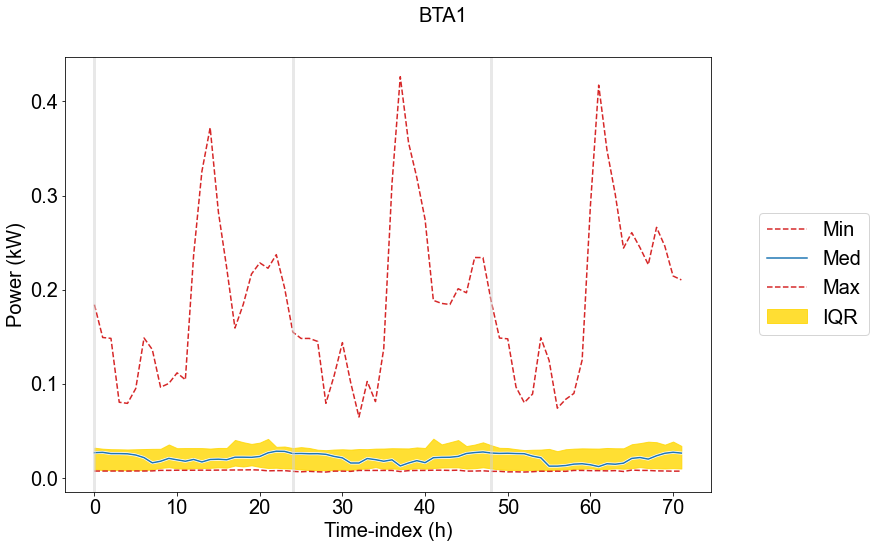

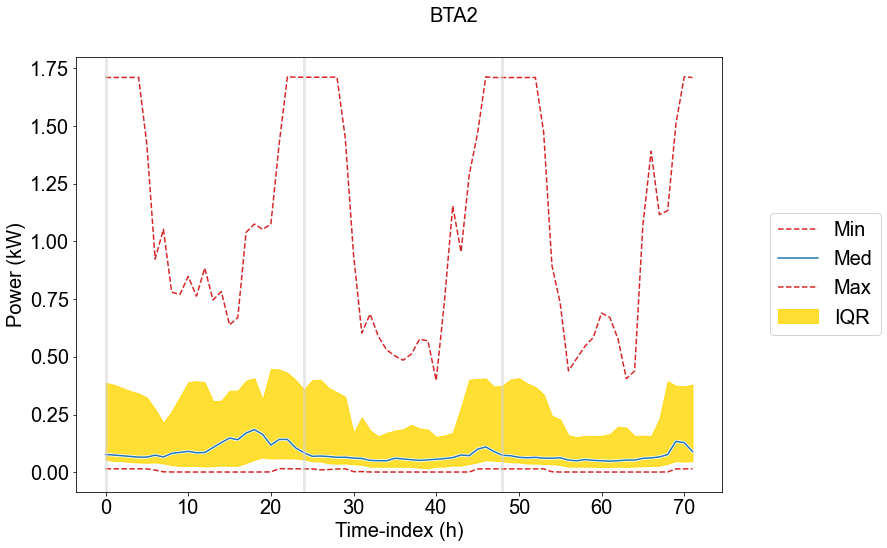

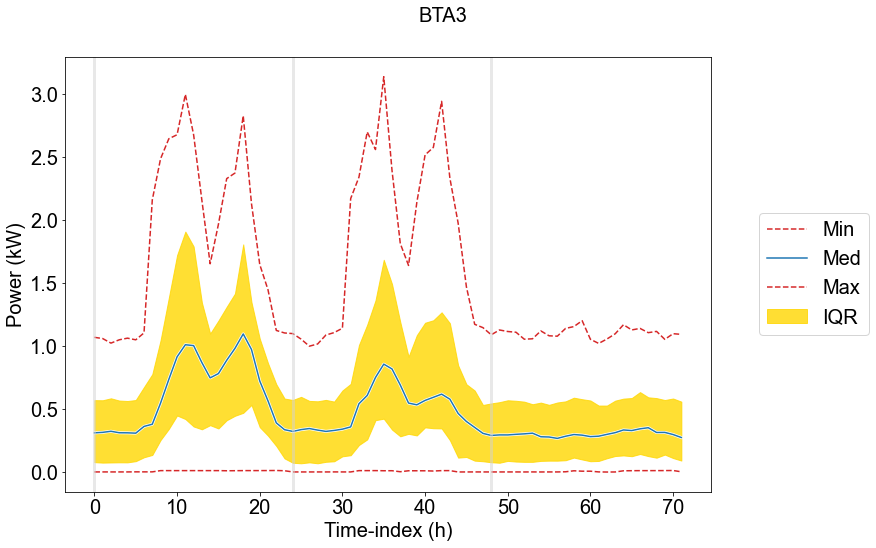

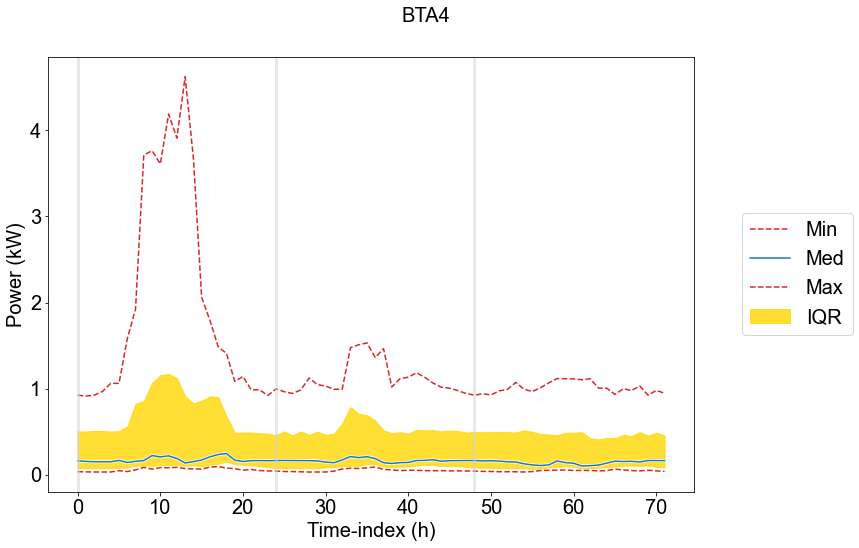

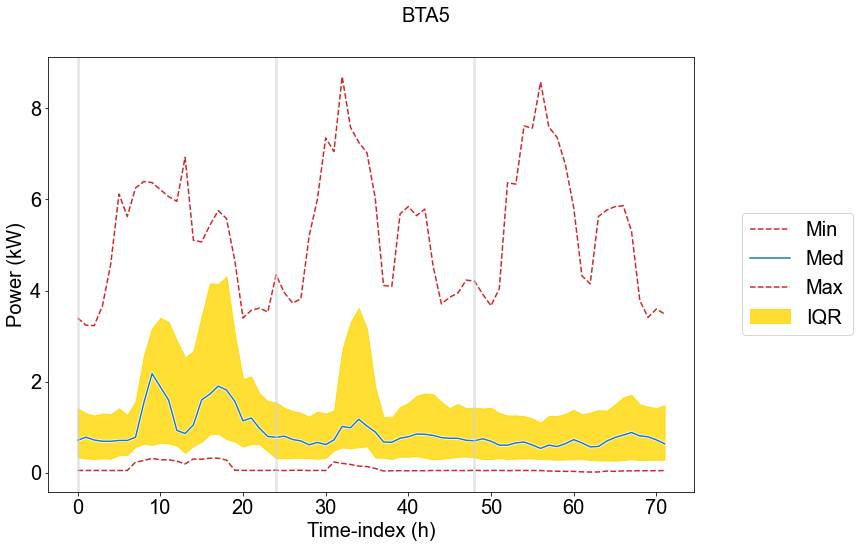

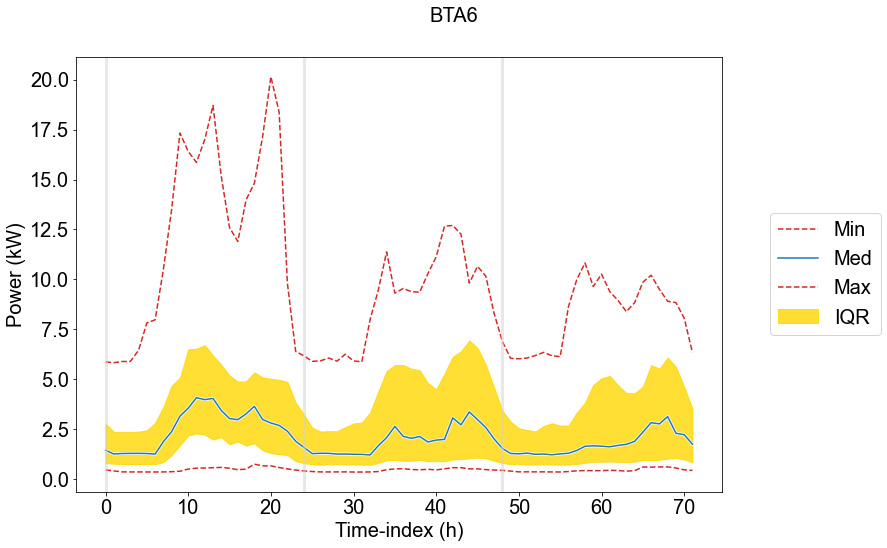

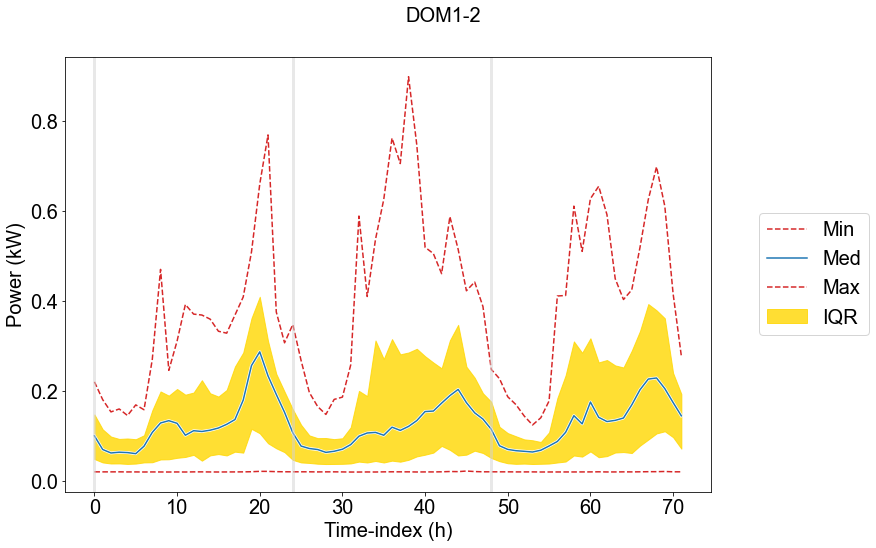

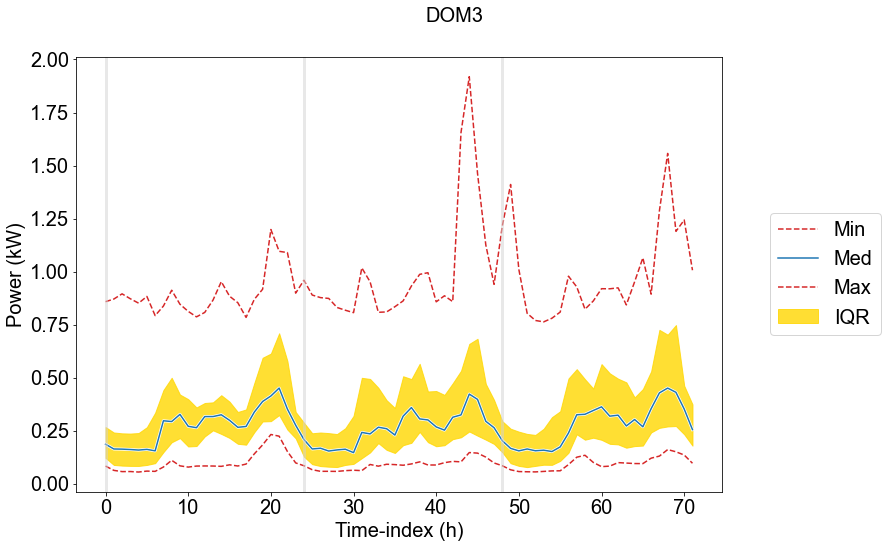

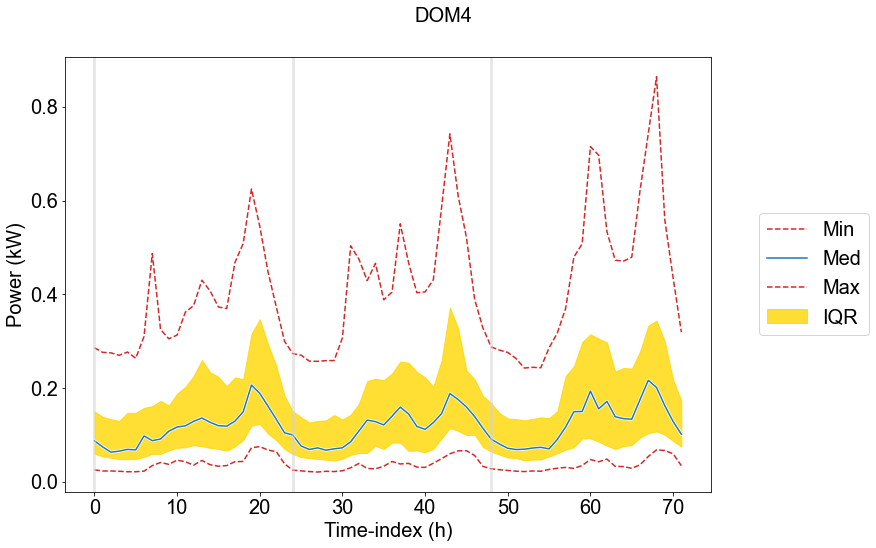

In [6]:
# Exploratory Data Analysis - Dataset composition

# Here, we analyze the dataset composition in terms of end user's hourly consumption
# by creating a "profile" of the percentiles of the consumption in the different hours of the
# typical load profile, organized by end-user class.

# Main plot parameters
cols = cols_y  # columns with the hourly consumption data
groupby = col_class  # column based on which the samples are divided

# Additional plot parameters
kwargs = dict(
    figsize=(14, 8),
    fontsize=20,
    xlabel='Time-index (h)',
    ylabel='Power (kW)',
)

# Create, show, and save the figure(s)
for group, plot_data in data.sort_values(by=[col_type]).groupby(groupby):
    title = (group if isinstance(group, str) else ", ".join(group)).upper().replace('_', '-') # title of the figure

    # Create, show, and save the figures
    fig = create_profile_percentiles(plot_data, cols, title=title, **kwargs)

    # We plot also the lines that delimit the different day types
    ax = fig.axes[0]
    for h in range(0, ni, nh):
        ax.axvline(h, alpha=0.5, lw=3, color='lightgrey')

    plt.show()
    if savefig:
        fig.savefig(os.path.join(outpath, f"fig_hourly_consumption_percentiles_{title.lower().replace('-', '_')}.{fmt}"), format=fmt, dpi=dpi)


In [7]:
# Dataset Normalization
# Here, we perform normalization of the dataset, since the values of consumption in sample
# of different end-user classes are very different.
# We perform a 'row-wise' normalization, where both the ToU consumption and the hourly
# load profiles are divided by the total energy bill.

# Normalizing
x_tot = data[cols_x].values.sum(axis=1).reshape(len(data), 1)
data[cols_x] = data[cols_x].values / x_tot
data[cols_y] = data[cols_y].values / x_tot

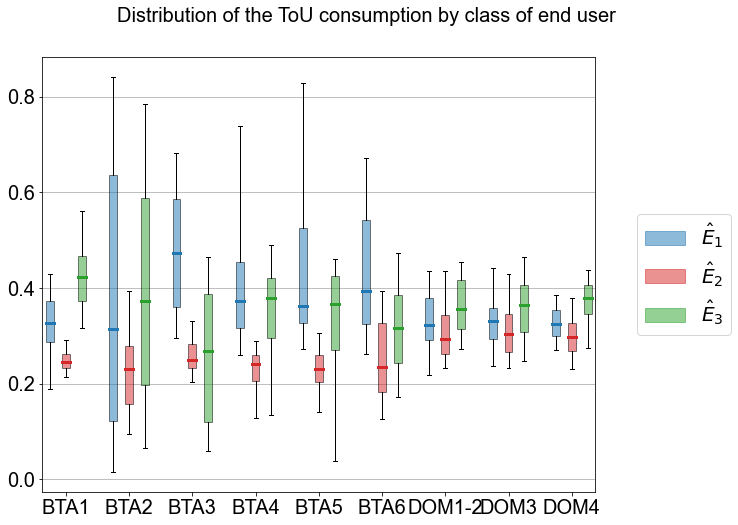

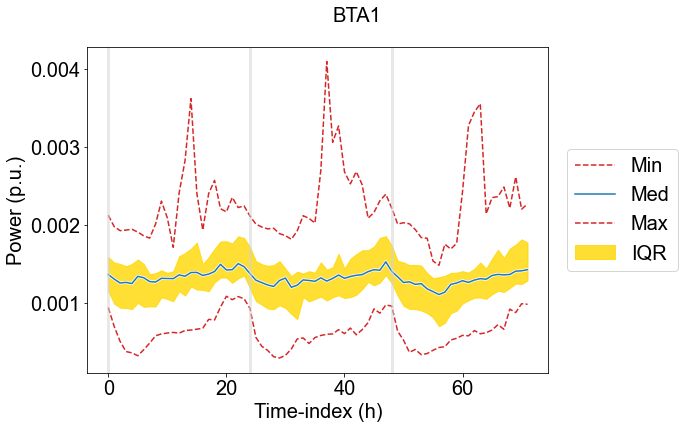

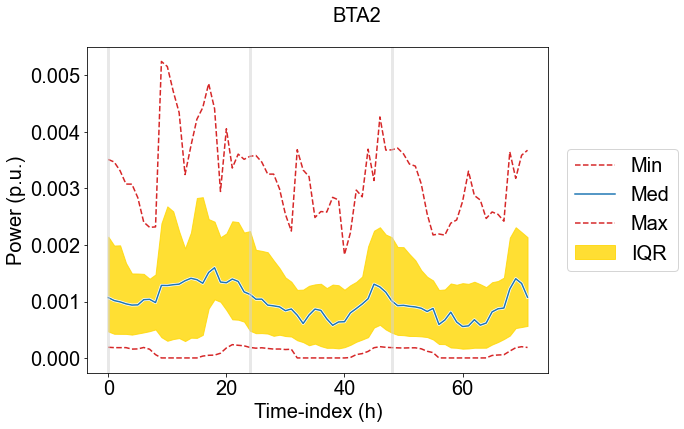

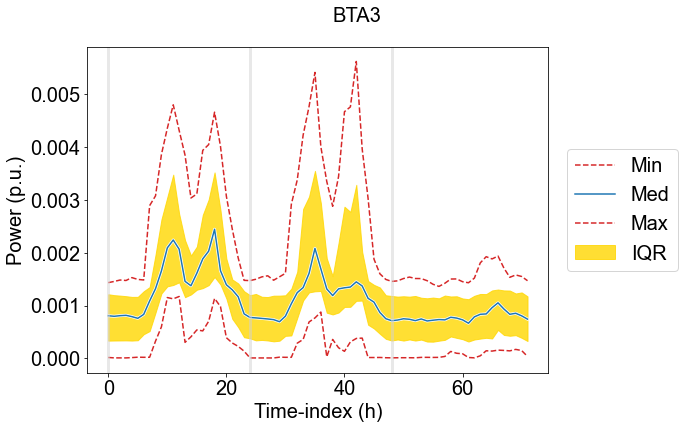

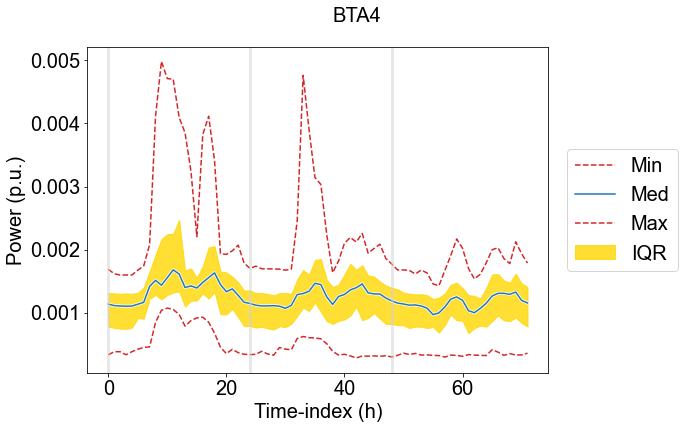

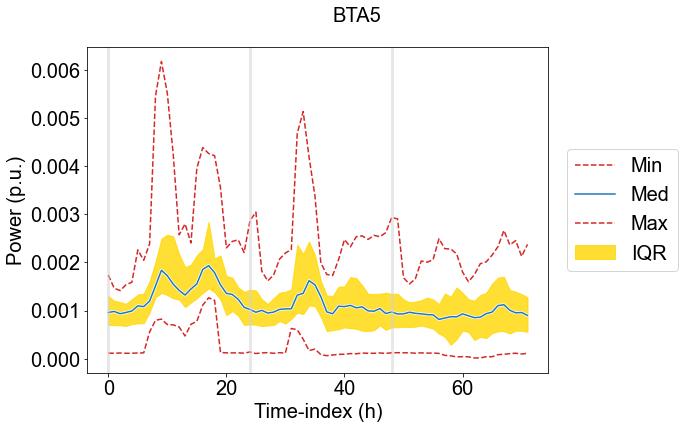

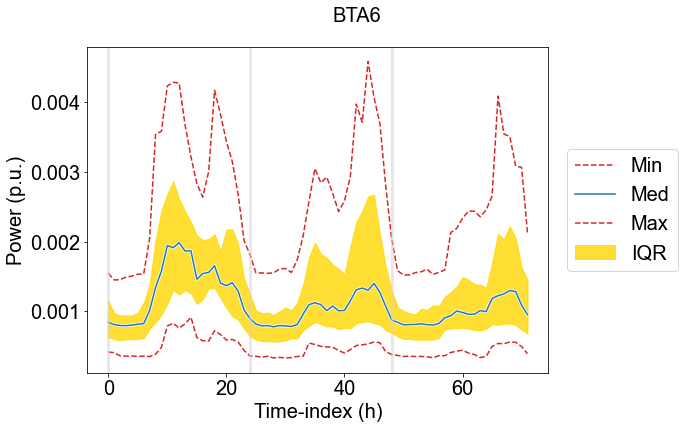

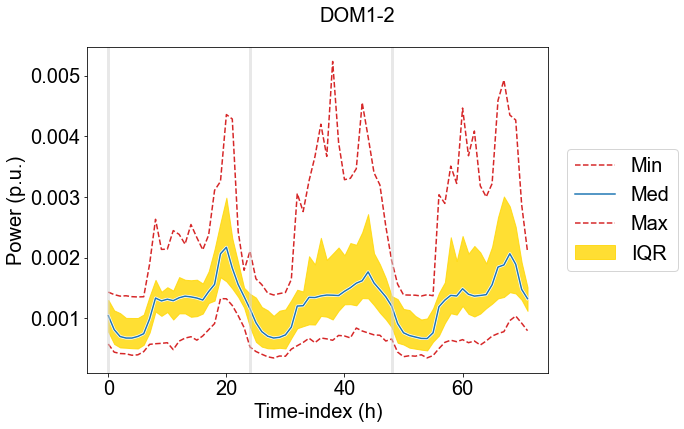

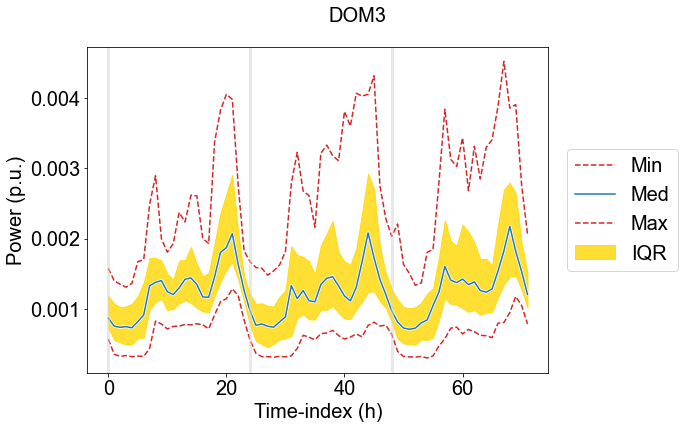

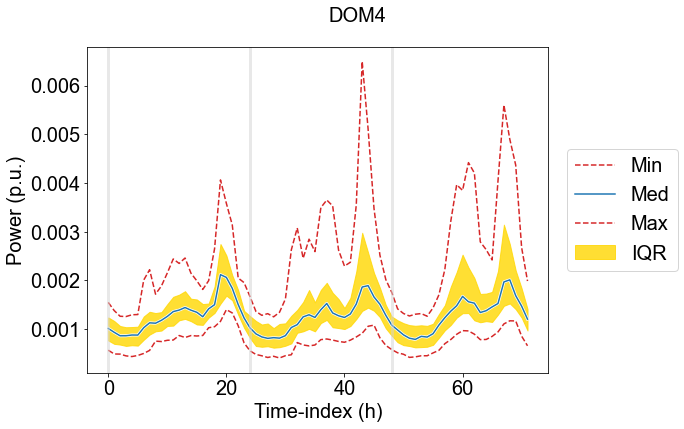

In [8]:
# Exploratory Data Analysis - Normalized dataset composition
# Here, we repeat the exploratory analysis on the monthly ToU and hourly consumption
# on the normalized dataset

# Boxplots of the ToU consumption
# Main plot parameters
fig = create_aligned_boxplots(
    data[cols_x].join(data[[groupby] if isinstance(groupby, str) else groupby]
                    .apply(lambda s: s.str.upper().str.replace('_', '-')),),
    groupby='class',
    cols=cols_x,
    **dict(title=f"Distribution of the ToU consumption by {groupby} of end user",
           figsize=(12, 8),
           fontsize=20,
           horizontal=False,
           xlabel='Monthly energy (p.u.)',
           legend_labels=["$\hat{E}_\mathrm{1}$", "$\hat{E}_\mathrm{2}$", "$\hat{E}_\mathrm{3}$"])
)
fig.subplots_adjust()  # trim any extra space on the plot
plt.show()
if savefig:
    fig.savefig(os.path.join(outpath, "fig_tou_consumption_boxplot_norm.png"), format=fmt, dpi=dpi)

# Percentiles of the hourly consumption
cols = cols_y  # columns with the hourly consumption data
groupby = col_class  # column based on which the samples are divided
for group, plot_data in data.sort_values(by=[col_type]).groupby(groupby):
    title = (group if isinstance(group, str) else ", ".join(group)).upper().replace('_', '-') # title of the figure
    fig = create_profile_percentiles(
        plot_data, cols, title=title,
        **dict(figsize=(10, 6),
               fontsize=20,
               xlabel='Time-index (h)',
               ylabel='Power (p.u.)',)
    )
    ax = fig.axes[0]
    for h in range(0, ni, nh):
        ax.axvline(h, alpha=0.5, lw=3, color='lightgrey')
    plt.show()
    if savefig:
        fig.savefig(os.path.join(outpath, f"fig_hourly_consumption_percentiles_norm_{title.lower().replace('-', '_')}.{fmt}"), format=fmt, dpi=dpi)